In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('w_h.csv')

In [ ]:
data

,Weight,Height
0,50,161
1,51,163
2,51,165
3,52,165
4,54,165
5,55,166
6,56,160
7,56,167
8,57,167
9,58,169


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  15 non-null     int64
 1   Height  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [ ]:
data.shape

(15, 2)

In [ ]:
data.columns

Index(['Weight', 'Height'], dtype='object')

In [ ]:
data.dtypes

,0
Weight,int64
Height,int64


In [ ]:
data.head()

,Weight,Height
0,50,161
1,51,163
2,51,165
3,52,165
4,54,165


In [ ]:
data.tail()

,Weight,Height
10,59,170
11,60,170
12,61,167
13,62,170
14,63,171


In [ ]:
data.describe()

,Weight,Height
count,15.000000,15.000000
mean,56.333333,166.400000
std,4.186145,3.333809
min,50.000000,160.000000
25%,53.000000,165.000000
50%,56.000000,167.000000
75%,59.500000,169.500000
max,63.000000,171.000000


In [ ]:
data.isnull().sum()

,0
Weight,0
Height,0


In [ ]:
data['Height'] = data['Height'].astype('int64')
data['Weight'] = data['Weight'].astype('int64')

In [ ]:
data.dtypes

,0
Weight,int64
Height,int64


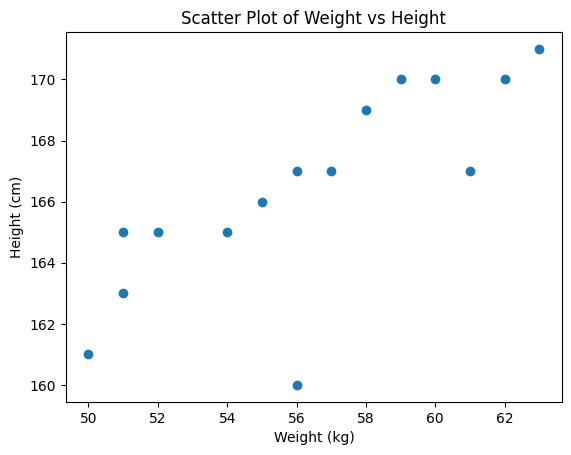

In [ ]:
plt.scatter(data['Weight'], data['Height'])
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Scatter Plot of Weight vs Height")
plt.show()

In [ ]:
# coorelation
data.corr()


,Weight,Height
Weight,1.000000,0.783084
Height,0.783084,1.000000


In [ ]:
data.dtypes

,0
Weight,int64
Height,int64


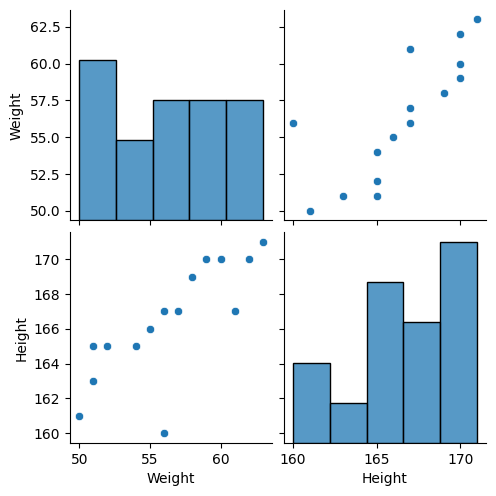

In [ ]:
sns.pairplot(data)

In [ ]:
# independent features : dataframe or 2D array
x=data['Weight']
type(x)

pandas.core.series.Series

In [ ]:
x=data['Height']
type(x)

pandas.core.series.Series

In [ ]:
# convert to dataframe
x=data[['Weight']]
type(x)

pandas.core.frame.DataFrame

In [ ]:
x=data[['Height']]
type(x)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(15, 2)

In [ ]:
# dependent features : series or 1D array

In [ ]:
y=data['Height']
type(y)

pandas.core.series.Series

In [ ]:
# train, test and split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[ 0.        ],
       [ 0.34578204],
       [-0.34578204],
       [-1.03734611],
       [ 1.72891019],
       [-0.34578204],
       [ 0.34578204],
       [ 1.38312815],
       [ 0.34578204],
       [-0.34578204],
       [-2.07469222]])

In [ ]:
# why we need to use fit_transfrom and transform, fit
# fit_transform - train data
# transform - test data
# fit - to find regression ??

In [ ]:
x_test= scaler.transform(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
x_test

array([[-57.04112256],
       [-56.92155734],
       [-57.9976443 ],
       [-56.92155734]])

In [ ]:
# applying simple linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
# n_jobs = -1 ??
lr.fit(x_train,y_train)


LinearRegression(n_jobs=-1)

In [ ]:
# print coefficent and intercept
print('Coefficient :',lr.coef_)
print('Intercept :',lr.intercept_)

Coefficient : [1.]
Intercept : -2.842170943040401e-14


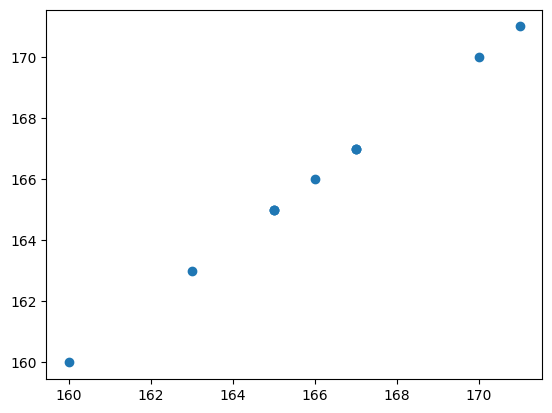

In [ ]:
plt.scatter(x_train,y_train)

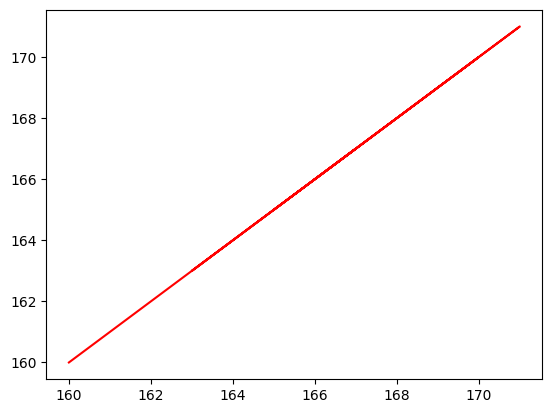

In [ ]:
plt.plot(x_train,lr.predict(x_train),color='red')